## Initialisierung einiger Werte

Suche das Maximum der Funktion `y = sin(x1) + cos(0.3 * x1 * x2)`

In [1694]:
####################################################
##### Initialisierung
##### es wird gesucht: Maximum der Funktion
##### f(x1,x2) = cos⁡(0.3 ∗𝑥1 ∗𝑥2)+1.5
####################################################
# Fitness f - speichert für jede Iteration f_max der aktuellen Population
f = []
fitness = []
P = []
matingpool = []
mating_pool_nach_crossover = []
mating_pool_nach_mutation = []

# Anzahl der Individuen in der Gesamtpopulation (= Chromosomen)
populationsize = 25

# n Größe des Matingpools (matingpool_size <= populationsize)
matingpool_size = 12

# xmin + xmax definieren den Bereich, in dem die P (erste Elterngeneration) 
# initialisiert wird
xmin = -6
xmax = 6

# schalte Crossover ein
calculate_crossover = True

# schalte Mutation ein
calculate_mutation = True


## Funktionen für die Berechnung der Fitness und Auswahl der Kandidaten für das Matingpool

In [1695]:
import numpy as np

def calculate_fitness(P):
    # Calculating the fitness value of each Individuum in the current population.
    # axis=1 sums over each population
    x1 = P[:,0]
    x2 = P[:,1]    
    fitness = np.sin(x1) + np.cos(0.3 * x1 * x2) + 1.5
    return fitness

def select_mating_pool(p, fitness, matingpool_size):
    # Wähle die besten Individuen der aktuellen Generation P für die nächste Generation aka matingpool
    # Identifiziere höchste Fitness
    import heapq
    highest_indices = heapq.nlargest(matingpool_size, range(len(fitness)), key=lambda i: fitness[i])
    mating_pool = p[highest_indices]
    return mating_pool 





## Implementiere die Funktionen crossover und mutation

In [1696]:
import random

def crossover(mating_pool,m):
    # mating_pool
    # m: anzahl der kandidaten aus matingpool, an denen crossover stattfinden wird
    usedIndividuals = set()
    for _ in range(m):
        indexOne = np.random.randint(0,len(mating_pool))
        indexTwo = np.random.randint(0,len(mating_pool))
        while (indexTwo==indexOne):
            indexOne = np.random.randint(0,len(mating_pool))
            indexTwo = np.random.randint(0,len(mating_pool))
        usedIndividuals = usedIndividuals.union({indexOne, indexTwo})
        
        attribute = np.random.randint(0,2)
        mating_pool[indexOne][attribute], mating_pool[indexTwo][attribute] = mating_pool[indexTwo][attribute], mating_pool[indexOne][attribute]
    return mating_pool

def mutation(mating_pool):    
    # a = anzahl der mutationen
    a = random.randint(0,5)
    for _ in range(a):
        change = 0.05*(np.random.rand() - 0.5)*2
        individuum = np.random.randint(0,len(mating_pool))
        attribute = np.random.randint(0,2)
        mating_pool[individuum][attribute] += change
    return mating_pool

## Plotten der Funktion f(x1,x2)

Text(0.5, 0, 'f(x1,x2)')

<Figure size 640x480 with 0 Axes>

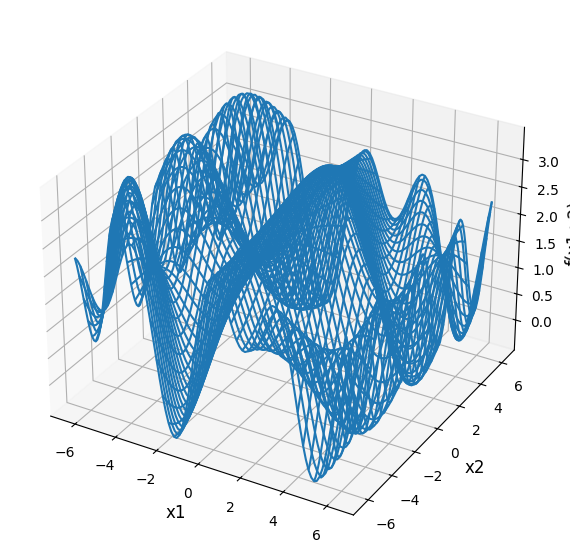

In [1697]:
import matplotlib.pyplot as plt

x1 = np.linspace(-6.3,6.3,100) 
x2 = np.linspace(-6.3,6.3,100) 
mx1,mx2 = np.meshgrid(x1,x2)
y = np.sin(mx1) + np.cos(0.3 * mx1 * mx2) + 1.5

fig = plt.figure()
plt.figure(figsize=(8,7))
ax = plt.axes(projection='3d')
ax.plot_wireframe(mx1,mx2,y)

ax.set_xlabel('x1',fontsize=12)
ax.set_ylabel('x2',fontsize=12)
ax.set_zlabel('f(x1,x2)',fontsize=12)

## I Initialisiere Elterngeneration

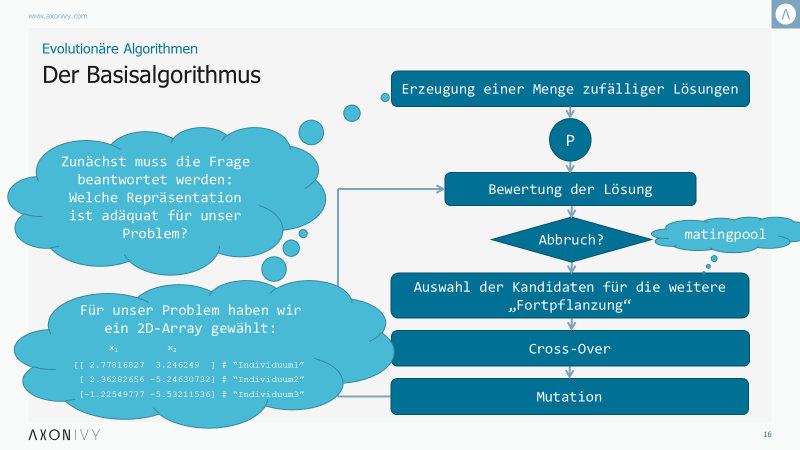

In [1698]:
####################################################
##### I Initialisiere Elterngeneration
####################################################

# Initialisiere P (Elterngeneration)
gen_pool = (populationsize,2)

P = np.random.uniform(low=xmin, high=xmax, size=gen_pool)

print('Erste Elterngeneration')
print(gen_pool[0],' Individuen, ',' x1,x2')
print(P)


Erste Elterngeneration
25  Individuen,   x1,x2
[[-3.7852104   0.00677089]
 [ 5.56987017 -3.88645818]
 [-3.13851561 -5.58539815]
 [ 2.79592198 -3.71111129]
 [ 2.08444241 -0.32429129]
 [-5.81310652 -1.76730554]
 [-2.99043205  1.50051045]
 [-3.86816279  1.18154552]
 [-1.75848499 -3.25465676]
 [-1.91016239 -3.89716867]
 [-3.09925991 -1.29429563]
 [-2.37077853 -3.95058216]
 [-3.62429694 -5.87040035]
 [ 0.85199343  3.39002577]
 [ 3.84404453 -4.4546823 ]
 [-2.98632834  1.95515749]
 [ 5.09304695  5.06395801]
 [ 5.91310165  5.08450445]
 [ 0.95849965 -5.92203847]
 [ 2.69984811  2.00750809]
 [-3.87044863 -4.32634301]
 [ 1.3060984   1.60951656]
 [ 1.6843819   2.04338209]
 [-2.93014236  1.44680221]
 [-5.54401515  0.17482842]]


## II Berechne Fitness

In [1699]:
####################################################
##### II Berechne Fitness
####################################################
import heapq
fitness = []

# Berechne Fitness aller Individuen
fitness = calculate_fitness(P)

# Fitness der Individuen, die ins Matingpool wandern
fittest_individuums = heapq.nlargest(matingpool_size,fitness)

print('Fitness der {} Individuen der ersten Generation: '.format(populationsize))
print('id:       x1              -      x2')
for i in range(populationsize):
    if fitness[i] in fittest_individuums:
        marker = '***'
    else:
        marker = ' '
    print(i,': ',P[i,0]," - ",P[i,1],' Fitness: ',fitness[i],marker)

print('Maximale Fitness: {} '.format(np.max(fitness)))

Fitness der 25 Individuen der ersten Generation: 
id:       x1              -      x2
0 :  -3.785210404770015  -  0.006770887471232889  Fitness:  3.1000637513804072 ***
1 :  5.569870170620174  -  -3.8864581842776103  Fitness:  1.8234913308512386  
2 :  -3.138515607964982  -  -5.585398154926823  Fitness:  2.0166819395411 ***
3 :  2.7959219773626174  -  -3.7111112891096147  Fitness:  0.8392424312523885  
4 :  2.084442408614972  -  -0.32429128534588525  Fitness:  3.350467262569873 ***
5 :  -5.813106522751263  -  -1.7673055410743386  Fitness:  0.9547280344575748  
6 :  -2.9904320459564895  -  1.5005104507211264  Fitness:  1.572173680988986  
7 :  -3.8681627913164047  -  1.18154551522038  Fitness:  2.3626589135537035 ***
8 :  -1.7584849888814151  -  -3.254656760801451  Fitness:  0.3718987692799163  
9 :  -1.9101623895610214  -  -3.8971686716903173  Fitness:  -0.05803307683385661  
10 :  -3.0992599132784955  -  -1.2942956260878127  Fitness:  1.8168595755002357  
11 :  -2.3707785257244263  - 

## Loop bis Abbruch 
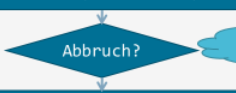  
Das Abbruchkriterium sollte während der Implementierung als Schleifencounter implementiert werden:
`while loop < 100`

Zum Testen einer implementierten Lösung sollte dann die zweite Abbruchbedingung genutzt werden (ggf. kann die Zahl angepasst werden - 3.5 wäre die analytisch richtige Lösung)
`while max(fitness) < 3.4999`

In [1700]:
loop = 0
while loop < 100 and max(fitness) < 3.4999:
#while max(fitness) < 3.4999:
####################################################
##### III a Wähle mating_pool
####################################################
    mating_pool = select_mating_pool(P, fitness, matingpool_size)

####################################################
##### III b Rekombination durch Crossover
####################################################
    if calculate_crossover:
        mating_pool_nach_crossover = crossover(mating_pool,3)
    
####################################################
##### III c Mutation
####################################################
    if calculate_mutation:
        mating_pool_nach_mutation = mutation(mating_pool_nach_crossover)

####################################################
##### Matingpool und Gesamtpopulation müssen nun 
##### wieder zusammen geführt werden. 
####################################################
        
####################################################
#### Tipp: Wie kannst Du an dieser Stelle noch mehr 
#### Variation in den Lösungsraum bringen?
####################################################

    
    start = 0
    end = matingpool_size
    
    if calculate_crossover:
        P[start:end, :] = mating_pool_nach_crossover
    
    if calculate_mutation:
        P[start:end, :] = mating_pool_nach_mutation

    
    fitness = calculate_fitness(P)
    
    # speichere  erreichte Fitness f
    f.append(np.max(fitness))
    loop=loop+1
    
####################################################
### The Winner is...
####################################################
print('loop ',loop,'Max Fitness: ',np.max(fitness))
print(fitness)
w = np.argmax(fitness)
wx1 = P[w,0]
wx2 = P[w,1]
print('x1: ',wx1,' x2: ',wx2)


loop  100 Max Fitness:  3.4808854653074337
[3.48088547 3.27739274 3.46146048 3.45805734 3.45667106 3.44826435
 3.3739116  3.28084971 3.27889515 3.46018062 3.27281237 3.27281237
 2.95921652 2.90010455 1.26605677 1.16551626 0.68800385 0.21929107
 2.18662869 1.87235147 2.47210134 3.27281237 3.00618652 1.58468222
 3.13169673]
x1:  1.3856285228550784  x2:  0.15292746167210472


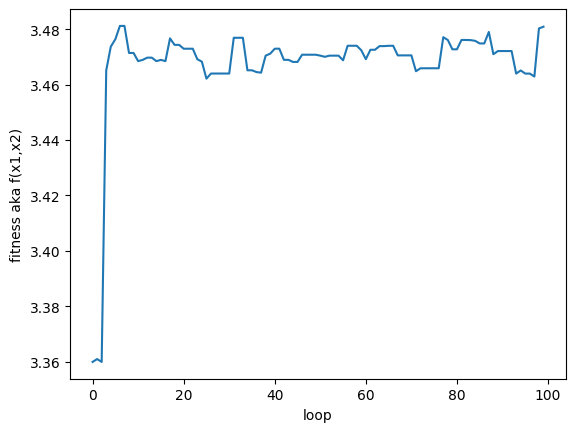

In [1701]:
# plotte Ergebnis
import matplotlib.pyplot as plt
plt.plot(f)
plt.xlabel('loop')

plt.ylabel('fitness aka f(x1,x2)')
plt.show()

## Visualisierung des Ergebnisses

<Figure size 640x480 with 0 Axes>

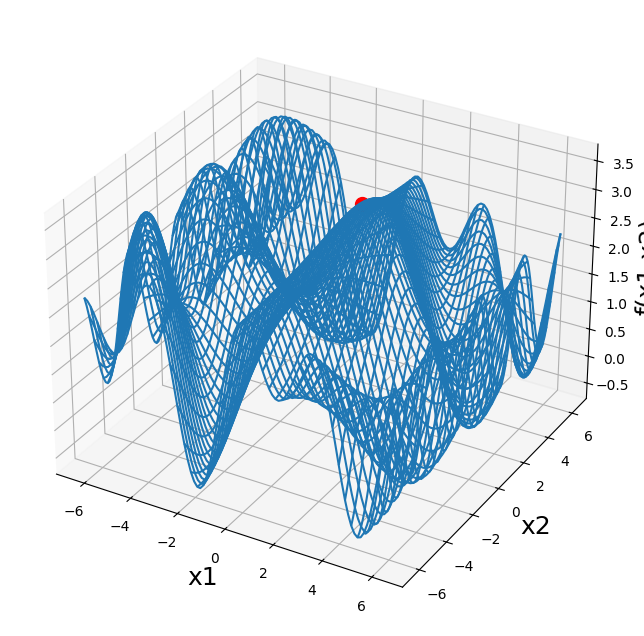

In [1702]:
x1 = np.linspace(-6.3,6.3,100) 
x2 = np.linspace(-6.3,6.3,100) 
mx1,mx2 = np.meshgrid(x1,x2)
y = np.sin(mx1) + np.cos(0.3 * mx1 * mx2) + 1.5
y_w = np.sin(wx1) + np.cos(0.3 * wx1 * wx2) + 1.5

fig = plt.figure()
plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.plot_wireframe(mx1,mx2,y,zorder=1)

ax.set_xlabel('x1',fontsize=18)
ax.set_ylabel('x2',fontsize=18)
ax.set_zlabel('f(x1,x2)',fontsize=18)

ax.scatter(wx1,wx2,y_w,s=100,marker='o',color='red',zorder=2)